# Анализ популярности компьютерных игр

По данным до 2016 года необходимо спрогнозировать какие игры будут популярны в 2017-м. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

## Изучение данных из файла

### Обзор данных

In [1]:
# импорт библиотеки pandas, matplotlib, numpy, scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# чтение файла с данными и сохранение в data
try: games = pd.read_csv('/datasets/games.csv') 
except: games = pd.read_csv('games.csv')
# получение общей информации о данных в таблице
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB


In [3]:
# посмотрим как выглядят данные
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# какие есть платформы
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [5]:
# посмотрим годы выпуска
games['Year_of_Release'].value_counts()

2,008.00    1427
2,009.00    1426
2,010.00    1255
2,007.00    1197
2,011.00    1136
2,006.00    1006
2,005.00     939
2,002.00     829
2,003.00     775
2,004.00     762
2,012.00     653
2,015.00     606
2,014.00     581
2,013.00     544
2,016.00     502
2,001.00     482
1,998.00     379
2,000.00     350
1,999.00     338
1,997.00     289
1,996.00     263
1,995.00     219
1,994.00     121
1,993.00      62
1,981.00      46
1,992.00      43
1,991.00      41
1,982.00      36
1,986.00      21
1,989.00      17
1,983.00      17
1,990.00      16
1,987.00      16
1,988.00      15
1,985.00      14
1,984.00      14
1,980.00       9
Name: Year_of_Release, dtype: int64

In [6]:
# посмотрим жанры
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [7]:
# посмотрим рейтинг
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [8]:
# проверим названия колонок
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
# проверим явные дубликаты
games.duplicated().sum()

0

### Вывод

Перед нами данные о продажах игр c 1980 до 2016 гг. Записи составлены о **16715 играх** на **31 платформе**. Кроме названия и платформы, имеется информация о продажах, оценках, рейтинге.

По превым оценкам данных можно отметить: 
 - После 1993 года количество игр резко увеличивается, а с 2012 сокращается. 
 - Больше всего игр выпущено для платформы PS2 и DS

Есть пропуски. Дубликаты не выявлены.

Для подготовки данных необходимо:

* Заменить названия столбцов (привести к нижнему регистру)
* Преобразуйте данные в нужные типы: год выпуска,  оценка критиков в int
* Обработать пропуски: в столбцах с названием, платформой, годом выпуска, жанром, оценках и рейтинге 


## Предобработка данных

### Стиль заголовков

In [10]:
# поправим название столбцов
games.columns = games.columns.str.lower()

# проверим название столбца
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Пропуски значений и замена типа данных

In [11]:
# удалим 2 строки без названия и жанра и пропуски в year_of_release
games.dropna(subset = ['name', 'year_of_release'], inplace = True)
games = games.reset_index(drop=True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [12]:
# переведем в int
games['year_of_release'] = games['year_of_release'].astype('int')

In [13]:
# проверим количество пропусков в critic_score
games['critic_score'].isna().sum()

8461

In [14]:
# проверим количество пропусков в user_score
games['user_score'].isna().sum()

6605

In [15]:
# посмотрим какие значения у user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
# посмотрим на строки с tbd
games[games['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E


In [17]:
# заменим на пропуски 'tbd'
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games = games.reset_index(drop=True)
games['user_score'].isna().sum()

8981

In [18]:
# Посмоторим группировку по платформе
games.loc[:, ['platform', 'critic_score', 'user_score', 'rating', 'name']].groupby('platform').count()

,critic_score,user_score,rating,name
platform,,,,
2600,0,0,0,116
3DO,0,0,0,3
3DS,166,171,223,512
DC,14,14,14,52
DS,708,512,1255,2121
GB,0,0,0,97
GBA,430,251,514,811
GC,437,357,457,542
GEN,0,0,0,27


In [19]:
# Посмоторим группировку по году
games.loc[:, ['year_of_release', 'critic_score', 'user_score', 'rating', 'name']].groupby('year_of_release').count()

,critic_score,user_score,rating,name
year_of_release,,,,
1980,0,0,0,9
1981,0,0,0,46
1982,0,0,0,36
1983,0,0,0,17
1984,0,0,0,14
1985,1,1,1,14
1986,0,0,0,21
1987,0,0,0,16
1988,1,1,1,15


In [20]:
# Посмоторим группировку по году, исключив платформы без оценок
no_score_list = ("WS", "GB", "N64", "SAT", "SNES")
games.query('platform not in @no_score_list').pivot_table(
    index= 'year_of_release', 
    values = ('name', 'critic_score', 'user_score', 'rating'), 
    aggfunc = ('count')
)

,critic_score,name,rating,user_score
year_of_release,,,,
1980,0,9,0,0
1981,0,46,0,0
1982,0,36,0,0
1983,0,17,0,0
1984,0,14,0,0
1985,1,14,1,1
1986,0,21,0,0
1987,0,16,0,0
1988,1,14,1,1


### Новые столбцы

In [21]:
# Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

In [22]:
# посмотим топ продаж
games.sort_values(by = 'total_sales', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Вывод

Пропуски в year_of_release (265) заменили на 0, подразумевая, что год не известен. Также преобразовали в int.

В столбцах critic_score и user_score много пропущенных значений, отбросить их пока нельзя. Кроме того, в user_score есть значения tbd, что скорее всего означает: "будет определено позднее", значит тоже данных нет. 

Для 14 платформ из 31 нет данных по оценкам и рейтингу. Кроме того, почти оценки отсутствуют для выпуска до 1996 года. Если убрать пропуски по платформам, для которых оценок нет, все равно остаются пропуски. Для анализа оценок лучше сделать выборку по годам.

В топ 10 кассовых игр вошли игры на платформах Wii и Nintendo про Марио и спорт.

## Анализ данных

**Выпуск игр по годам**

In [23]:
# Посмотрите, сколько игр выпускалось в разные годы
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

**Вывод**: Как отмечалось ранее, после 1993 года количество игр резко увеличивается, а с 2012 сокращается. Возможно, это связано с сокращением числа платформ и обновлением старого поколения. Для анализа и планирования наиболее важный период с 2012 года, когда в целом менялась индустрия игр. 

**Топовые платформы**

In [24]:
# Выберем платформы с наибольшими суммарными продажами 
games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)

platform
PS2    1,233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [25]:
# построим распределение по годам для топовых платформ
top_sales_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10).index
games.query('platform in @top_sales_platform').pivot_table(
    index = 'year_of_release', columns = 'platform', values = ('total_sales'), aggfunc = 'sum')

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


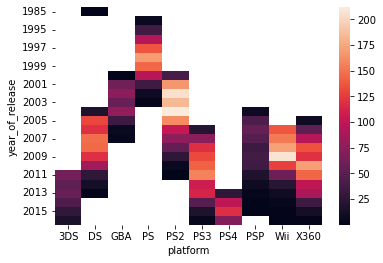

In [26]:
sns.heatmap(games.query('platform in @top_sales_platform').pivot_table(
    index = 'year_of_release', columns = 'platform', values = ('total_sales'), aggfunc = 'sum'))
plt.show()

**Вывод**: Среди лидеров по продажам такие платформы: PS2, X360, Wii, PS3, DS, PS, GBA, PS4, PSP, XB.

Стоит отметить, что это платформы разных поколений, и некоторые уже не работают. Средний срок обновления - 5-8 лет. Для исследования будут интересны те, которые еще используются.


* **Актуальный период**

In [27]:
# отберем платформы с продажами после 2005
games.query('year_of_release >= 2005').pivot_table(
    index = 'platform', columns = 'year_of_release', values = ('name'), aggfunc = 'count')

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,116.00,93.00,91.00,80.00,86.00,46.00
DC,NaN,NaN,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,118.00,201.00,376.00,492.00,403.00,323.00,153.00,23.00,8.00,NaN,NaN,NaN
GBA,135.00,39.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,97.00,40.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,37.00,52.00,62.00,76.00,107.00,90.00,139.00,61.00,38.00,47.00,50.00,54.00
PS2,260.00,259.00,214.00,191.00,96.00,38.00,7.00,NaN,NaN,NaN,NaN,NaN
PS3,NaN,27.00,90.00,138.00,162.00,181.00,215.00,148.00,126.00,108.00,73.00,38.00
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00,75.00,137.00,164.00


In [28]:
# отберем платформы с продажами после 2011
games.query('(year_of_release >= 2012) and (platform not in ("DS","PSP"))').pivot_table(
    index = 'platform', columns = 'year_of_release', values = ('name'), aggfunc = 'count')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,93.00,91.00,80.00,86.00,46.00
PC,61.00,38.00,47.00,50.00,54.00
PS3,148.00,126.00,108.00,73.00,38.00
PS4,NaN,16.00,75.00,137.00,164.00
PSV,53.00,63.00,100.00,110.00,85.00
Wii,31.00,12.00,6.00,4.00,1.00
WiiU,32.00,42.00,31.00,28.00,14.00
X360,106.00,75.00,63.00,35.00,13.00
XOne,NaN,19.00,61.00,80.00,87.00


In [29]:
# посмотрим, какой объем продаж для неизвестного года
games.query('year_of_release == 0')['platform'].value_counts('total_sales')

Series([], Name: platform, dtype: float64)

In [30]:
# вычислим продажи для рассматриывемого периода
games.query('(year_of_release >= 2012) and (platform not in ("DS","PSP"))').pivot_table(
    index = 'platform', columns = 'year_of_release', values = ('total_sales'), aggfunc = 'sum')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60
X360,99.74,88.58,34.74,11.96,1.52
XOne,NaN,18.96,54.07,60.14,26.15


In [31]:
# отберем года
years = games.query('year_of_release >= 2012')['year_of_release'].unique()
years

array([2013, 2015, 2012, 2014, 2016])

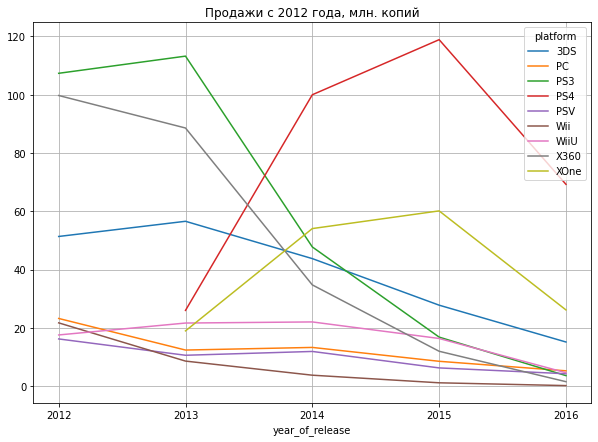

In [32]:
# построим график продаж
games.query('(year_of_release >= 2012) and (platform not in ("DS","PSP"))').pivot_table(
    index = 'year_of_release', columns = 'platform', values = ('total_sales'), aggfunc = 'sum').plot(figsize = (10,7))
plt.title('Продажи с 2012 года, млн. копий')
plt.grid(True)
plt.xticks(years)
plt.show()

In [33]:
# выделим отдельный датасет для актуального периода и действующими платформами
actual_games = games.query('(year_of_release >= 2012) and (platform not in ("DS","PSP"))')
actual_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2682 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2682 non-null   object 
 1   platform         2682 non-null   object 
 2   year_of_release  2682 non-null   int64  
 3   genre            2682 non-null   object 
 4   na_sales         2682 non-null   float64
 5   eu_sales         2682 non-null   float64
 6   jp_sales         2682 non-null   float64
 7   other_sales      2682 non-null   float64
 8   critic_score     1310 non-null   float64
 9   user_score       1524 non-null   float64
 10  rating           1589 non-null   object 
 11  total_sales      2682 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 272.4+ KB


In [34]:
# исходя из графика, отберем 3 лидера рынка
lider_list = ['PS4', 'XOne', '3DS']
# оценим их продажи
actual_games.query('platform in @lider_list').pivot_table(
    index = 'platform', columns = 'year_of_release', values = ('total_sales'), aggfunc = 'sum')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
PS4,NaN,25.99,100.00,118.90,69.25
XOne,NaN,18.96,54.07,60.14,26.15


In [35]:
actual_games.query('(platform in @lider_list)').pivot_table(
    index = 'year_of_release', columns = 'platform', values = ('total_sales'), aggfunc = 'sum')

platform,3DS,PS4,XOne
year_of_release,,,
2012,51.36,NaN,NaN
2013,56.57,25.99,18.96
2014,43.76,100.00,54.07
2015,27.78,118.90,60.14
2016,15.14,69.25,26.15


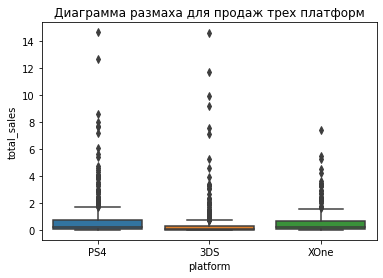

In [36]:
sns.boxplot(data = (actual_games.query('platform in @lider_list')), x = 'platform', y = 'total_sales')
plt.title('Диаграмма размаха для продаж трех платформ')
plt.show()

In [37]:
# посмотрим распределение игр по платформам для данного периода
actual_games['platform'].value_counts()

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
WiiU    147
Wii      54
Name: platform, dtype: int64

**Вывод**: Как видно из первой таблицы, период, который охватит действующте платформы (кроме DS и PSP, они относятся еще к предыдущему поколению), начинается с 2012 года. 

Кроме того, стоит отметить, что данные, год которых не известен (заменили на 0), содержат не существенный объем данных по актуальным платформам.

Возможно за 2016 год собраны еще не все данные, и поэтому наблюдается падение продаж для всех платформ. Но все таки можно выделить 3 наиболее популярные: PS4, XOne, 3DS. 

По диаграмме размаха можно сделать следующие выводы:
- продажи у PS4 значительно выше, чем у 3DS и XOne
- медиана у 3DS и XOne находится примерно на одном уровне - около 35 млн. копий
- распределение у 3DS и XOne больше похоже на нормальное
- распределение у PS4 смещено, что говорит о выбрасах с меньшей стороны

### Игры и оценки

In [38]:
# выделим датасет только для PS4
# удалим пропуски, для выявления взаимосвязи замена на средние значения могут искозить результаты
ps4 = actual_games.query('platform == "PS4"')
ps4 = ps4.dropna().reset_index(drop = True)
ps4['user_score'] = pd.to_numeric(ps4['user_score'], errors='coerce')
ps4 = ps4.dropna().reset_index(drop = True)
ps4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             239 non-null    object 
 1   platform         239 non-null    object 
 2   year_of_release  239 non-null    int64  
 3   genre            239 non-null    object 
 4   na_sales         239 non-null    float64
 5   eu_sales         239 non-null    float64
 6   jp_sales         239 non-null    float64
 7   other_sales      239 non-null    float64
 8   critic_score     239 non-null    float64
 9   user_score       239 non-null    float64
 10  rating           239 non-null    object 
 11  total_sales      239 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 22.5+ KB


In [39]:
actual_games['total_sales'].describe()

count   2,682.00
mean        0.53
std         1.28
min         0.01
25%         0.04
50%         0.14
75%         0.47
max        21.05
Name: total_sales, dtype: float64

/Users/yuliaanikeeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sales'>

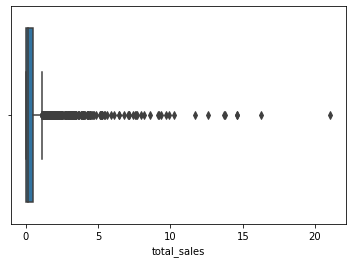

In [40]:
sns.boxplot(actual_games['total_sales'])

In [41]:
# посмотрим корреляцию между столбцами для PS4
ps4.loc[:, [ 
        'critic_score', 
        'user_score', 
        'total_sales'
    ]].query('total_sales < 1.5').corr()

,critic_score,user_score,total_sales
critic_score,1.00,0.65,0.31
user_score,0.65,1.00,0.03
total_sales,0.31,0.03,1.00


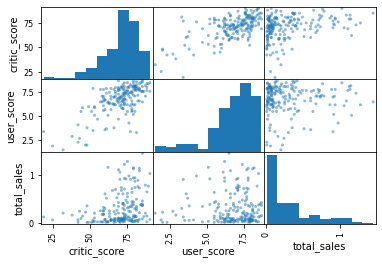

In [42]:
# прстроим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(
    ps4.loc[:, [ 
        'critic_score', 
        'user_score', 
        'total_sales'
    ]].query('total_sales < 1.5'))
plt.show()

**Вывод по PS4**: по полученным матрицам корреляций и диаграмм рассеяния можно сделать вывод, что влияния на продажи отзывы пользователей не оказывают, а оценки критиков лишь в малой степени. 

In [43]:
# выделим датасет только для XOne
# удалим пропуски, для выявления взаимосвязи замена на средние значения могут искозить результаты
xone = actual_games.query('platform == "XOne"')
xone = xone.dropna().reset_index(drop = True)
xone['user_score'] = pd.to_numeric(xone['user_score'], errors='coerce')
xone = xone.dropna().reset_index(drop = True)
xone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             159 non-null    object 
 1   platform         159 non-null    object 
 2   year_of_release  159 non-null    int64  
 3   genre            159 non-null    object 
 4   na_sales         159 non-null    float64
 5   eu_sales         159 non-null    float64
 6   jp_sales         159 non-null    float64
 7   other_sales      159 non-null    float64
 8   critic_score     159 non-null    float64
 9   user_score       159 non-null    float64
 10  rating           159 non-null    object 
 11  total_sales      159 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 15.0+ KB


In [44]:
# посмотрим корреляцию между столбцами для XOne
xone.loc[:, [ 
        'critic_score', 
        'user_score', 
        'total_sales'
    ]].query('total_sales < 1.5').corr()

,critic_score,user_score,total_sales
critic_score,1.00,0.57,0.41
user_score,0.57,1.00,0.09
total_sales,0.41,0.09,1.00


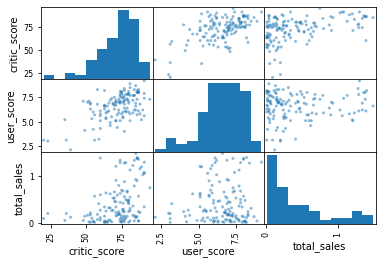

In [45]:
# прстроим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(
    xone.loc[:, [ 
        'critic_score', 
        'user_score', 
        'total_sales'
    ]].query('total_sales < 1.5'))
plt.show()

**Вывод по XOne**: так же как и в случае с PS4 отзывы пользователей не влияниют на продажи, а оценки критиков лишь в малой степени. 

In [46]:
# выделим датасет только для DS3
# удалим пропуски, для выявления взаимосвязи замена на средние значения могут искозить результаты
ds3 = actual_games.query('platform == "3DS"')
ds3 = ds3.dropna().reset_index(drop = True)
ds3['user_score'] = pd.to_numeric(ds3['user_score'], errors='coerce')
ds3 = ds3.dropna().reset_index(drop = True)
display(ds3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             100 non-null    object 
 1   platform         100 non-null    object 
 2   year_of_release  100 non-null    int64  
 3   genre            100 non-null    object 
 4   na_sales         100 non-null    float64
 5   eu_sales         100 non-null    float64
 6   jp_sales         100 non-null    float64
 7   other_sales      100 non-null    float64
 8   critic_score     100 non-null    float64
 9   user_score       100 non-null    float64
 10  rating           100 non-null    object 
 11  total_sales      100 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 9.5+ KB


None

In [47]:
ds3.loc[:, [
        'critic_score', 
        'user_score', 
        'total_sales'
    ]].query('total_sales < 1.5').corr()

,critic_score,user_score,total_sales
critic_score,1.00,0.70,0.21
user_score,0.70,1.00,0.17
total_sales,0.21,0.17,1.00


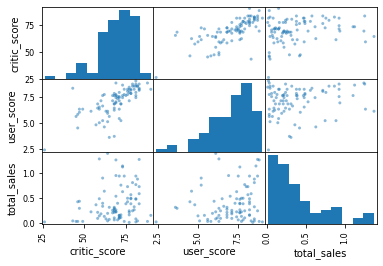

In [48]:
# прстроим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(
    ds3.loc[:, [
        'critic_score', 
        'user_score', 
        'total_sales'
    ]].query('total_sales < 1.5'))
plt.show()

***Вывод по DS3***: отзывы пользователей и оценки критиков лишь в малой степени влияют на продажи. 

**Вывод по платформам**: для платформ можно отметить схожую ситуаци, когда отзывы и оценки не имеют значительного влияния на продажи

### Игры и жанры

In [49]:
# посмотрим на лидирующие жанры по продажам
actual_games.pivot_table(
    index = ['genre'], values = 'total_sales', aggfunc = ('sum', 'count') 
).sort_values(by = 'sum', ascending = False)

,count,sum
genre,,
Action,953,435.54
Shooter,235,304.73
Role-Playing,339,180.91
Sports,256,179.55
Misc,180,84.15
Platform,83,60.31
Racing,115,53.50
Fighting,105,44.13
Simulation,78,34.85


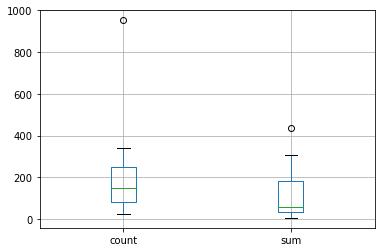

In [50]:
# посмотрим разброс по жанрам 
actual_games.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = ('sum', 'count') ).boxplot()
plt.show()

In [51]:
# выведем показатели по данным
actual_games.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = ('sum', 'count') ).describe()

,count,sum
count,12.00,12.00
mean,223.50,118.57
std,248.66,133.66
min,24.00,4.79
25%,81.75,33.06
50%,147.50,56.91
75%,249.25,179.89
max,953.00,435.54


<AxesSubplot:xlabel='genre', ylabel='total_sales'>

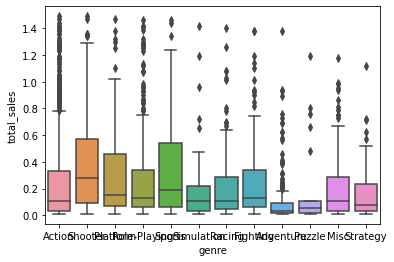

In [52]:
sns.boxplot(data = actual_games.query('total_sales < 1.5'), x = 'genre', y = 'total_sales')
# actual_games.query('genre = "Action"')

In [53]:
# медианные значения продаж по жанрам
actual_games.pivot_table(
    index = ['genre'], values = 'total_sales', aggfunc = ('median') ).sort_values(by = 'total_sales')

,total_sales
genre,
Adventure,0.04
Puzzle,0.06
Strategy,0.08
Simulation,0.12
Action,0.13
Racing,0.14
Misc,0.14
Fighting,0.15
Role-Playing,0.16


**Вывод**: 12 жанров, самый популярный шутеры (медиана - 0.44 млн. копий). Так же можно выделить жанр с низкими продажами (менее 30,7 млн. копий и медианой ниже 0.1 млн. копий): причключения, стратегии и пазлы. Одновременно можно отметить высокие продажи жанра экшн-игры (384,6 млн. копий за актуальный период).


## Портрет пользователя каждого региона

In [54]:
# определим топовые платформы по регионам
region_sales  = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_sales:
    display(actual_games.pivot_table(
        index = 'platform', values = region, aggfunc = 'sum'
    ).sort_values(
        by = region, ascending = False).head(5))

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


In [55]:
actual_games.pivot_table(
        index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10
X360,74.52,1.57,140.05
XOne,51.59,0.34,93.12


In [56]:
# определим топовые жанры по регионам
region_sales  = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_sales:
    display(actual_games.pivot_table(
        index = 'genre', values = region, aggfunc = 'sum').sort_values(by = region, ascending = False).head(5))

,na_sales
genre,
Action,177.00
Shooter,144.77
Sports,81.38
Role-Playing,60.65
Misc,38.13


,eu_sales
genre,
Action,158.43
Shooter,113.47
Sports,68.84
Role-Playing,46.76
Racing,27.29


,jp_sales
genre,
Role-Playing,59.12
Action,49.18
Misc,12.45
Simulation,10.35
Shooter,9.23


In [57]:
actual_games.pivot_table(
        index = 'genre', values = region_sales, aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
genre,,,
Action,158.43,49.18,177.00
Adventure,9.41,6.56,8.92
Fighting,10.79,9.08,19.79
Misc,25.95,12.45,38.13
Platform,20.98,8.63,25.17
Puzzle,1.31,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,46.76,59.12,60.65
Shooter,113.47,9.23,144.77


In [58]:
# определим продажи в зависимости от рейтинга игры
actual_games.dropna().reset_index(drop = True).pivot_table(
    index = 'rating', values = region_sales, aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,97.39,26.42,98.63
E10+,41.46,7.95,58.40
M,183.82,20.02,217.67
T,49.86,21.71,61.32


Рейтинги ESRB

- E — Everyone
- E10+ — Everyone 10+
- T — Teen
- M — Mature


In [59]:
actual_games.pivot_table(
    index = 'rating', values = region_sales, aggfunc = 'count')

,eu_sales,jp_sales,na_sales
rating,,,
E,380,380,380
E10+,301,301,301
M,498,498,498
T,410,410,410


**Вывод**: В зависимости от региона предрочтения игроков меняются. В частности:
- в североамеринском регионе лидируют X360, PS4, PS3, XOne, 3DS, среди жанров лидируют экшн и шутеры, и, соответственно жанрам, самый распространенный рейтинг рейтинг Mature.
- в европейском регионе лидируют PS4, PS3, X360, XOne, 3DS среди жанров лидируют так же экшн и шутеры, и, соответственно жанрам, самый распространенный рейтинг Mature.
- в Японии лидируют 3DS, PS3, PSV, PS4, WiiU среди жанров лидируют так же ролевые и экшн, и самый распространенный рейтинг Everyone.

## Проверка гипотезы

#### **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую и альтернативную теории:
    
    - H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются
    

In [ ]:
# подготовим данные PC для проверки 
pc = actual_games.query('platform == "PC"')
pc = pc.dropna().reset_index(drop = True)
pc['user_score'] = pd.to_numeric(pc['user_score'], errors='coerce')
pc = pc.dropna().reset_index(drop = True)
pc.info()

In [ ]:
# проведем тест
alpha = 0.05 #критический уровень статистической значимости

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'])

print('p-значение:', round(results.pvalue, 3))

if results.pvalue < (alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")





**Вывод**: С высокой долей вероятности можно утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

#### **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформулируем нулевую и альтернативную теории:
    
    - H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
    - H1: Средние пользовательские рейтинги жанров Action и Sports различаются
    

In [ ]:
# подготовим данные для проверки
actual_games = actual_games.dropna().reset_index(drop = True)
actual_games['user_score'] = actual_games['user_score'].astype('float')
actual_games = actual_games.dropna().reset_index(drop = True)
actual_games.info()

In [ ]:
# проведем тест
alpha = 0.05 #критический уровень статистической значимости

results = st.ttest_ind(
    actual_games.query('genre == "Action"')['user_score'], 
    actual_games.query('genre == "Sports"')['user_score'])

print('p-значение:', round(results.pvalue, 3))

if results.pvalue < (alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")






**Вывод**: С высокой долей вероятности можно утверждать, что средние пользовательские рейтинги жанров Action и Sports различаются. 

## Общий вывод

В рамках данной работы рассмотрены данные о продажах и оценках игр c 1980 до 2016 гг. 

Для анализа загружен и обработан файл games.csv. Записи составлены о **16715 играх** на **31 платформе**. Проверены пропуски и дубликаты, преобразованы типы данных и округлены значения.  

Представленные данные позволяют сделать вывод об изменениях на рынке игр. В частности, после 1993 года количество игр резко увеличивается, а с 2012 сокращается. Все это обусловлено сменой поколений платформ.
Больше всего игр выпущено для платформы PS2 и DS. В топ 10 кассовых игр за весь период вошли игры на платформах Wii и Nintendo про Марио и спорт.

В качестве актуального периода выбраны 2012-2016 гг..

Самый популярный жанр - экшн-игры,а низкие продажи у игр в жанре причключения, стратегии и пазлы.

В североамеринском и европейском регионе  схожие предрочтения игроков: лидируют X360, PS4, PS3, XOne, 3DS, среди жанров лидируют экшн и шутеры, и, соответственно жанрам, самый распространенный рейтинг рейтинг Mature. В Японии лидируют 3DS, PS3, PSV, PS4, WiiU, чаще выбирают игры для всех возрастов в жанрах ролевые и экшн.

С учетом проведенных тестов, можно отметить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а также, что пользователи по-разному оценивают жанры Action и Sports.
